**CNN Transfer Learning** to detect image is forged or not using casia12 dataset.

In [24]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from zipfile import ZipFile
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
filenames = "/content/drive/My Drive/data12"

In [27]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import zipfile
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [28]:
filenames = os.listdir("/content/drive/My Drive/data12/train")

categories = []

for file_name in filenames:
    if file_name.split('_')[0] == 'Au':
        categories.append(1)
    else:
        categories.append(0)
        
df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})

df.head()

,filename,category
0,Au_ani_00010.jpg,1
1,Au_ani_00023.jpg,1
2,Au_ani_00015.jpg,1
3,Au_ani_00018.jpg,1
4,Au_ani_00007.jpg,1


In [29]:
df.tail()

,filename,category
795,Tp_S_NRN_S_B_arc00029_arc00029_01093.tif,0
796,Tp_S_NRN_S_B_arc00054_arc00054_01072.tif,0
797,Tp_S_NRN_S_B_arc00053_arc00053_00273.tif,0
798,Tp_S_NRN_S_B_arc00052_arc00052_01074.tif,0
799,Tp_S_NRN_S_B_arc20011_arc20011_01464.tif,0


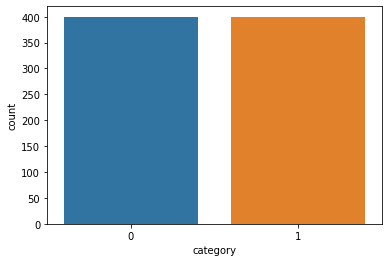

In [30]:
import seaborn as sns

sns.countplot(x = 'category', data = df)

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [49]:
image_size = 400

input_shape = (image_size, image_size, 3)

Traditional cnn model


In [50]:
simple_model = keras.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = input_shape),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    
    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    layers.Dense(1, activation = 'sigmoid'),
    
    
])

simple_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 398, 398, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 197, 197, 64)      18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 197, 197, 64)      256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 98, 98, 64)       

In [51]:
simple_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [52]:
df["category"] = df["category"].replace({0: 'Tp', 1: 'Au'})

In [53]:
from sklearn.model_selection import train_test_split

train_df, validate_df = train_test_split(df, test_size = 0.2)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

In [54]:
train_datagen = ImageDataGenerator(
    
    rescale = 1./255,
    rotation_range = 15, 
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
)

In [55]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [56]:
batch_size = 20

In [57]:
train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    "/content/drive/My Drive/data12/train", 
                                                    x_col = 'filename', 
                                                    y_col = 'category',
                                                    class_mode = 'binary',
                                                    target_size = (400, 400), 
                                                    batch_size = batch_size,
                                                   )

Found 640 validated image filenames belonging to 2 classes.


In [58]:
validation_generator = validation_datagen.flow_from_dataframe(validate_df, 
                                                    "/content/drive/My Drive/data12/train", 
                                                    x_col = 'filename', 
                                                    y_col = 'category',
                                                    class_mode = 'binary',
                                                    target_size = (400, 400), 
                                                    batch_size = batch_size,
                                                   )


Found 160 validated image filenames belonging to 2 classes.


In [59]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(patience=10)

callbacks = [earlystop]

In [60]:
history = simple_model.fit(train_generator,
                                epochs=5,     # 20
                                validation_data = validation_generator,
                                validation_steps=1,     
                                steps_per_epoch=10,
                                callbacks = callbacks
                                )

Epoch 1/5
10/10 [==============================] - 11s 814ms/step - loss: 1.9777 - accuracy: 0.5450 - val_loss: 8.8491 - val_accuracy: 0.5500
Epoch 2/5
10/10 [==============================] - 7s 698ms/step - loss: 0.9626 - accuracy: 0.6566 - val_loss: 27.2423 - val_accuracy: 0.6000
Epoch 3/5
10/10 [==============================] - 7s 737ms/step - loss: 1.0331 - accuracy: 0.5940 - val_loss: 29.8781 - val_accuracy: 0.5000
Epoch 4/5
10/10 [==============================] - 8s 761ms/step - loss: 0.8339 - accuracy: 0.6465 - val_loss: 13.3031 - val_accuracy: 0.7000
Epoch 5/5
10/10 [==============================] - 7s 707ms/step - loss: 0.8595 - accuracy: 0.5765 - val_loss: 24.0455 - val_accuracy: 0.5000


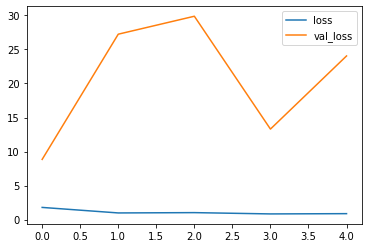

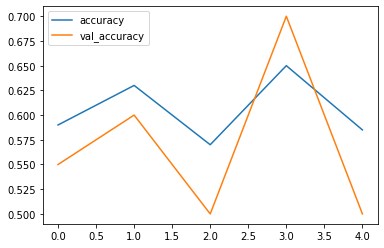

In [61]:
history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

TRASFER LEARNING ARCHITECTURE--->VGG16 MODEL

In [44]:
from tensorflow.keras.applications.vgg16 import VGG16

pretrained_base = VGG16(input_shape = input_shape, include_top = False, weights = 'imagenet')

pretrained_base.trainable = False

In [45]:
x = layers.Flatten()(pretrained_base.output)

x = layers.Dense(512, activation = 'relu')(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(1, activation = 'sigmoid')(x)

model = keras.models.Model(pretrained_base.input, x)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 400, 400, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 400, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 400, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 200, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 200, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 200, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 100, 128)     0   

In [46]:
history_vgg = model.fit(train_generator,
                    epochs = 10,     # 20
                    validation_data = validation_generator,
                    validation_steps = 1,     
                    steps_per_epoch = 10,
                    callbacks = callbacks
                    )

Epoch 1/10
10/10 [==============================] - 66s 7s/step - loss: 8.8719 - accuracy: 0.5010 - val_loss: 2.2975 - val_accuracy: 0.6500
Epoch 2/10
10/10 [==============================] - 50s 5s/step - loss: 5.0988 - accuracy: 0.6196 - val_loss: 0.9635 - val_accuracy: 0.7500
Epoch 3/10
10/10 [==============================] - 38s 4s/step - loss: 3.7405 - accuracy: 0.6448 - val_loss: 2.4802 - val_accuracy: 0.6500
Epoch 4/10
10/10 [==============================] - 25s 2s/step - loss: 3.7809 - accuracy: 0.6670 - val_loss: 0.8855 - val_accuracy: 0.8500
Epoch 5/10
10/10 [==============================] - 20s 2s/step - loss: 2.6683 - accuracy: 0.6199 - val_loss: 1.5157 - val_accuracy: 0.6000
Epoch 6/10
10/10 [==============================] - 15s 1s/step - loss: 1.8286 - accuracy: 0.7064 - val_loss: 1.6434 - val_accuracy: 0.6500
Epoch 7/10
10/10 [==============================] - 17s 2s/step - loss: 1.1603 - accuracy: 0.7332 - val_loss: 0.7687 - val_accuracy: 0.6500
Epoch 8/10
10/10 [==

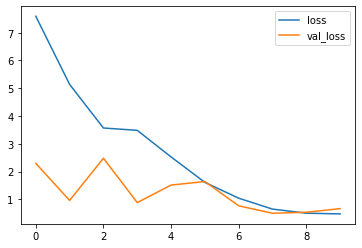

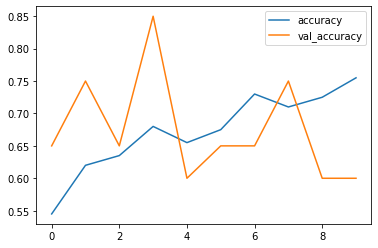

In [47]:
history_vgg_frame = pd.DataFrame(history_vgg.history)

history_vgg_frame.loc[:, ['loss', 'val_loss']].plot()
history_vgg_frame.loc[:, ['accuracy', 'val_accuracy']].plot()